In [1]:
#sparting spark and reading Reddit
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('spark://ec2-34-218-102-254.us-west-2.compute.amazonaws.com:7077').appName("Reddit").getOrCreate()
df = None
df = spark.read.csv("s3a://andrew-bierbaum-insight-test-dataset/Reddit_PushShift/Reddit_Comments_PushShift-00000000000*.csv.gz", header=True,multiLine=True, escape='"')

In [2]:
#spark.sql.caseSensitive = False
#sqlContext.sql("set spark.sql.caseSensitive=false")

In [3]:
#showing the start of the data and format
df.show(5)
df.printSchema()

+------------+--------------------+----------------------+--------------------+--------------------+----------+------------+-----------+---------+-----------+------------+--------+--------------+-----+------+--------+----------------+------------+---------+------+--------------------+--------------------+----------+
|      author|   author_flair_text|author_flair_css_class|                body|         created_utc| subreddit|subreddit_id|  parent_id|  link_id|         id|send_replies|stickied|subreddit_type|score|gilded|can_gild|controversiality|is_submitter|no_follow|edited|           permalink|        retrieved_on|      name|
+------------+--------------------+----------------------+--------------------+--------------------+----------+------------+-----------+---------+-----------+------------+--------+--------------+-----+------+--------+----------------+------------+---------+------+--------------------+--------------------+----------+
| CyborgCat42|                null|           

In [4]:
from pyspark.sql.functions import to_timestamp
df = df.withColumn("created_utc", to_timestamp("created_utc", "yyyy-MM-dd HH:mm:ss z")) #time format is = "2018-06-14 16:00:51 UTC"
df.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- body: string (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- id: string (nullable = true)
 |-- send_replies: string (nullable = true)
 |-- stickied: string (nullable = true)
 |-- subreddit_type: string (nullable = true)
 |-- score: string (nullable = true)
 |-- gilded: string (nullable = true)
 |-- can_gild: string (nullable = true)
 |-- controversiality: string (nullable = true)
 |-- is_submitter: string (nullable = true)
 |-- no_follow: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: string (nullable = true)
 |-- name: string (nullable = true)



In [5]:
#Convert spark data to be readable using sql queries
df.createOrReplaceTempView("Reddit")
happy_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body RLIKE 'finesse|Finesse'")
happy_results.show()
Happy_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '%Finesse%'")
Happy_results.show()

+-------------------+--------------------+
|        created_utc|                body|
+-------------------+--------------------+
|2018-06-15 01:40:11|Same it’s between...|
|2018-06-15 02:27:59|Glaube das war ei...|
|2018-06-15 01:17:36|When doing an ene...|
|2018-06-15 02:13:57|>Should I be thin...|
|2018-06-15 01:44:28|I should've clari...|
|2018-06-15 01:44:10|Actually finesse....|
|2018-06-15 02:06:21|The made rapier t...|
|2018-06-15 02:29:15|Yeah, I'm a maste...|
|2018-06-15 01:43:29|His game is based...|
|2018-06-15 01:16:08|This is the funni...|
|2018-06-15 01:28:40|**Percee P - The ...|
|2018-06-15 02:25:22|\>Republicans mak...|
|2018-06-15 01:19:46|I went with ~~Mer...|
|2018-06-15 01:25:40|Why is England an...|
|2018-06-15 01:36:16|Most CFIs at glid...|
|2018-06-15 01:50:20|Not shes not. She...|
|2018-06-15 02:41:46|I watched a few j...|
|2018-06-15 03:22:33|You go ahead with...|
|2018-06-15 03:17:44|Barbarian Weapon ...|
|2018-06-15 02:52:10|Hell, Beau is fin...|
+----------

In [6]:
python_happy_results = happy_results.collect()
python_happy_results[0][0]

datetime.datetime(2018, 6, 15, 1, 40, 11)

In [7]:
xamarin_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body RLIKE 'xamarin|Xamarin'")
flutter_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body RLIKE 'flutter|Flutter'")
react_native_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body RLIKE 'react native|React native'")
#cross_xamarin_flutter_results.show()

In [8]:
#collect, convert dates to datetime format for later graphing, and sort data
from datetime import datetime
python_xamarin_results = xamarin_results.collect()
python_xamarin_results_cleaned = [(date, body.encode('ascii',errors='ignore')) for date, body in python_xamarin_results]
python_xamarin_results_cleaned.sort()


In [9]:
#repeat collect, convert dates to datetime format for later graphing, and sort data for flutter results
python_flutter_results = flutter_results.collect()
python_flutter_results_cleaned = [(date,body.encode('ascii',errors='ignore')) for date, body in python_flutter_results]
python_flutter_results_cleaned.sort()

In [10]:
#repeat collect, convert dates to datetime format for later graphing, and sort data for react native results
python_react_native_results = react_native_results.collect()
python_react_native_results_cleaned = [(date,body.encode('ascii',errors='ignore')) for date, body in python_react_native_results]
python_react_native_results_cleaned.sort()

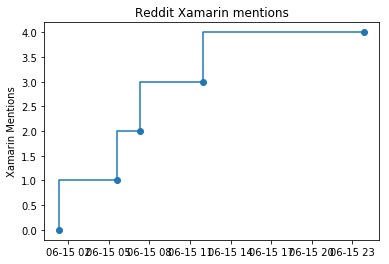

<Figure size 432x288 with 0 Axes>

In [11]:
#sort, number, and then graph the data
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
count = numpy.arange(len(python_xamarin_results_cleaned))
#Date_Data = matplotlib.dates.datestr2num(clean_python_results_utc)
Date_Data = []
Body_Data = []
for date, body in python_xamarin_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Xamarin Mentions')
matplotlib.pyplot.title('Reddit Xamarin mentions')
plt.show()
plt.savefig('Reddit_xamarin.png')

In [12]:
import pandas
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.to_csv("Reddit_xamarin.csv")
pandas_df

,body,date
0,Which is why Xamarin offers 3 flavours. Xamar...,2018-06-15 01:21:06
1,"only until the next update, which breaks your ...",2018-06-15 05:36:43
2,I suppose it's weird that you say you dislike ...,2018-06-15 07:19:52
3,I would recommend learning a cross platform to...,2018-06-15 11:56:47
4,Totally identify with your opinion and downvot...,2018-06-15 23:50:17


In [13]:
#find flutter posts that already contain xamarin and export to csv
#pandas_df[pandas_df['body'].str.contains('flutter')].to_csv('Reddit_xamarin_flutter_cross.csv')

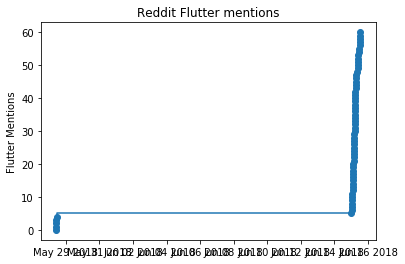

<Figure size 432x288 with 0 Axes>

In [14]:
#repeat graphing and later csv export for flutter
count = numpy.arange(len(python_flutter_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_flutter_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Flutter Mentions')
matplotlib.pyplot.title('Reddit Flutter mentions')
plt.show()
plt.savefig('Reddit_flutter.png')

#print csv for flutter
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.head()
pandas_df.to_csv("Reddit_flutter.csv")

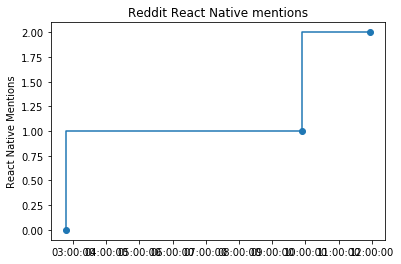

<Figure size 432x288 with 0 Axes>

In [15]:
#repeat graphing and later csv export for react native
count = numpy.arange(len(python_react_native_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_react_native_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('React Native Mentions')
matplotlib.pyplot.title('Reddit React Native mentions')
plt.show()
plt.savefig('Redditreact_native.png')

#print csv for flutter
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
pandas_df.head()
pandas_df.to_csv("Reddit_react_native.csv")